In [4]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *
from scipy.stats import t

In [5]:
t = (9.57-9.5)/(0.4/(160**0.5))              
a = 2*(1-stats.norm.cdf(t))

In [6]:
print t, a

2.21359436212 0.0268566955075


In [7]:
import sklearn
from sklearn import cross_validation, datasets, linear_model, metrics,ensemble

In [8]:
data = pd.read_csv("diamonds.txt",delimiter='\t')

In [9]:
data.head()
y = data.price
X = data.drop('price', axis=1)


In [10]:
X_train, X_test, y_train, y_test  = cross_validation.train_test_split(X, y, test_size=0.25, random_state=1)

In [11]:
linear_regressor = linear_model.LinearRegression()


In [12]:
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
linear_predict = linear_regressor.predict(X_test)
error = metrics.mean_absolute_error(y_test, linear_predict)
print 'error - ', error

error -  890.376400429


In [14]:
rf_classifier = ensemble.RandomForestRegressor(random_state = 1)

In [15]:
rf_classifier.fit(X_train,y_train)
forest_predict = rf_classifier.predict(X_test)
error = metrics.mean_absolute_error(y_test, forest_predict)
print 'error - ', error

error -  804.702882475


In [18]:
lin_deviation = map(lambda x, y: abs(x-y), linear_predict, y_test)
forest_deviation = map(lambda x, y: abs(x-y), forest_predict, y_test)

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


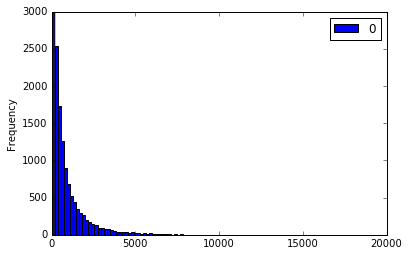

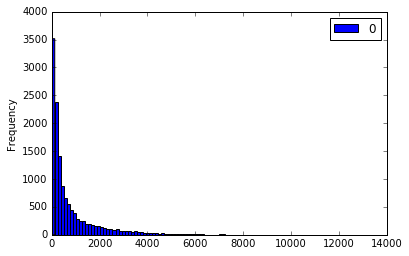

In [40]:
ld = pd.DataFrame(lin_deviation)
dd = pd.DataFrame(forest_deviation)
ld.plot.hist(bins=100)
dd.plot.hist(bins=100)
pylab.show()



In [41]:
#stats.probplot(ld - dd, dist = "norm", plot = pylab)
#pylab.show()
#print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(ld - dd)

In [42]:
stats.ttest_rel(ld, dd)

Ttest_relResult(statistic=array([ 12.74505678]), pvalue=array([  5.42865482e-37]))

In [43]:
print "95%% confidence interval: [%f, %f]" % DescrStatsW(ld - dd).tconfint_mean()

95% confidence interval: [72.497266, 98.849770]


In [44]:
print round(72.497266,4)

72.4973
